### Context
In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

### Content
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
17. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
import requests
from io import BytesIO
from PIL import Image

In [5]:
df = pd.read_csv('star_classification.csv')

In [6]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [8]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [3]:
#Pairplot
spectral_features = df[['u', 'g', 'r', 'i', 'z','class']]

In [4]:
# Outliners in the dataset had values of -9999
spectral_features = spectral_features[(spectral_features['u'] != -9999) &
                             (spectral_features['g'] != -9999) &
                             (spectral_features['r'] != -9999) &
                             (spectral_features['i'] != -9999) &
                             (spectral_features['z'] != -9999)]

# Display the new shape of the data and a few rows to confirm cleaning
print("New shape of the dataset:", spectral_features.shape)
spectral_features.head()


New shape of the dataset: (99999, 6)


,u,g,r,i,z,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY


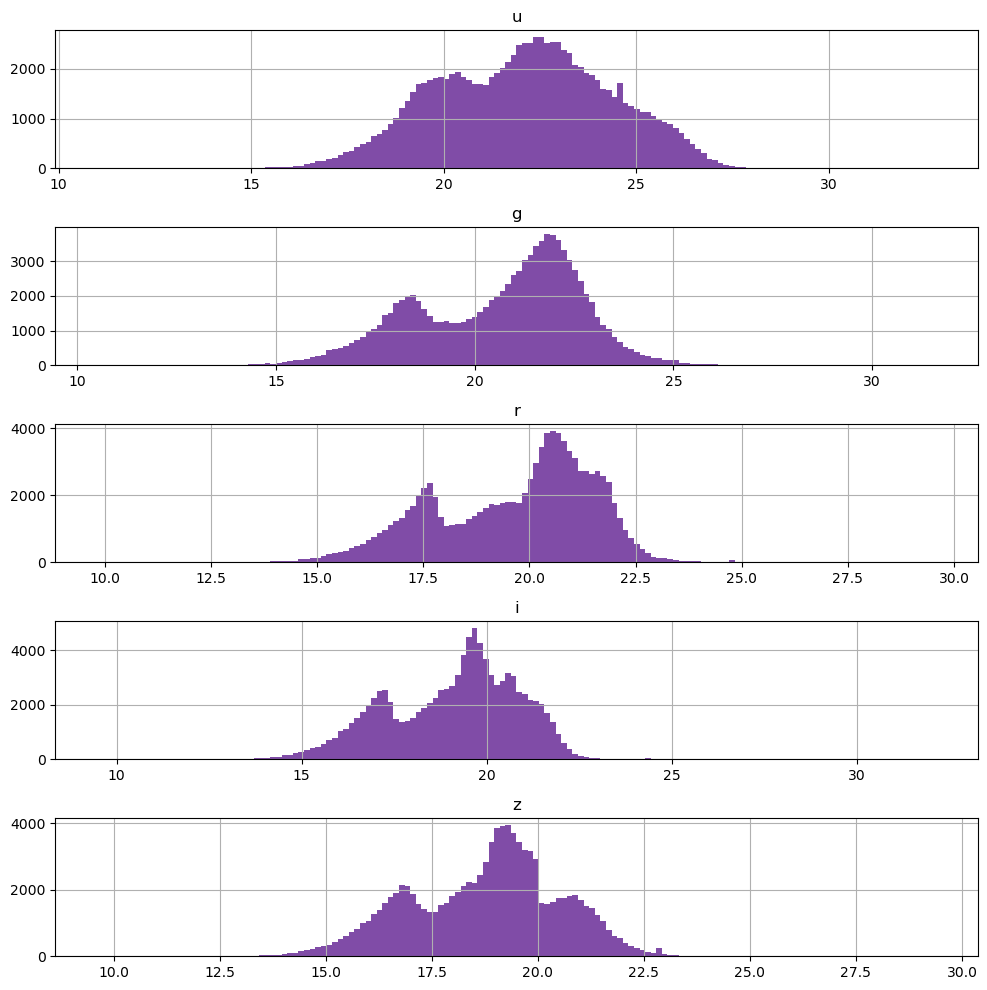

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 10))  
spectral_features.hist(ax=axes, bins=150, color='indigo', alpha=0.7)
plt.tight_layout()

In [12]:
sf=spectral_features.iloc[np.random.permutation(spectral_features.shape[0])[0:1000]]

/Users/luis/opt/anaconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luis/opt/anaconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luis/opt/anaconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luis/opt/anaconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

<Figure size 12000x12000 with 0 Axes>

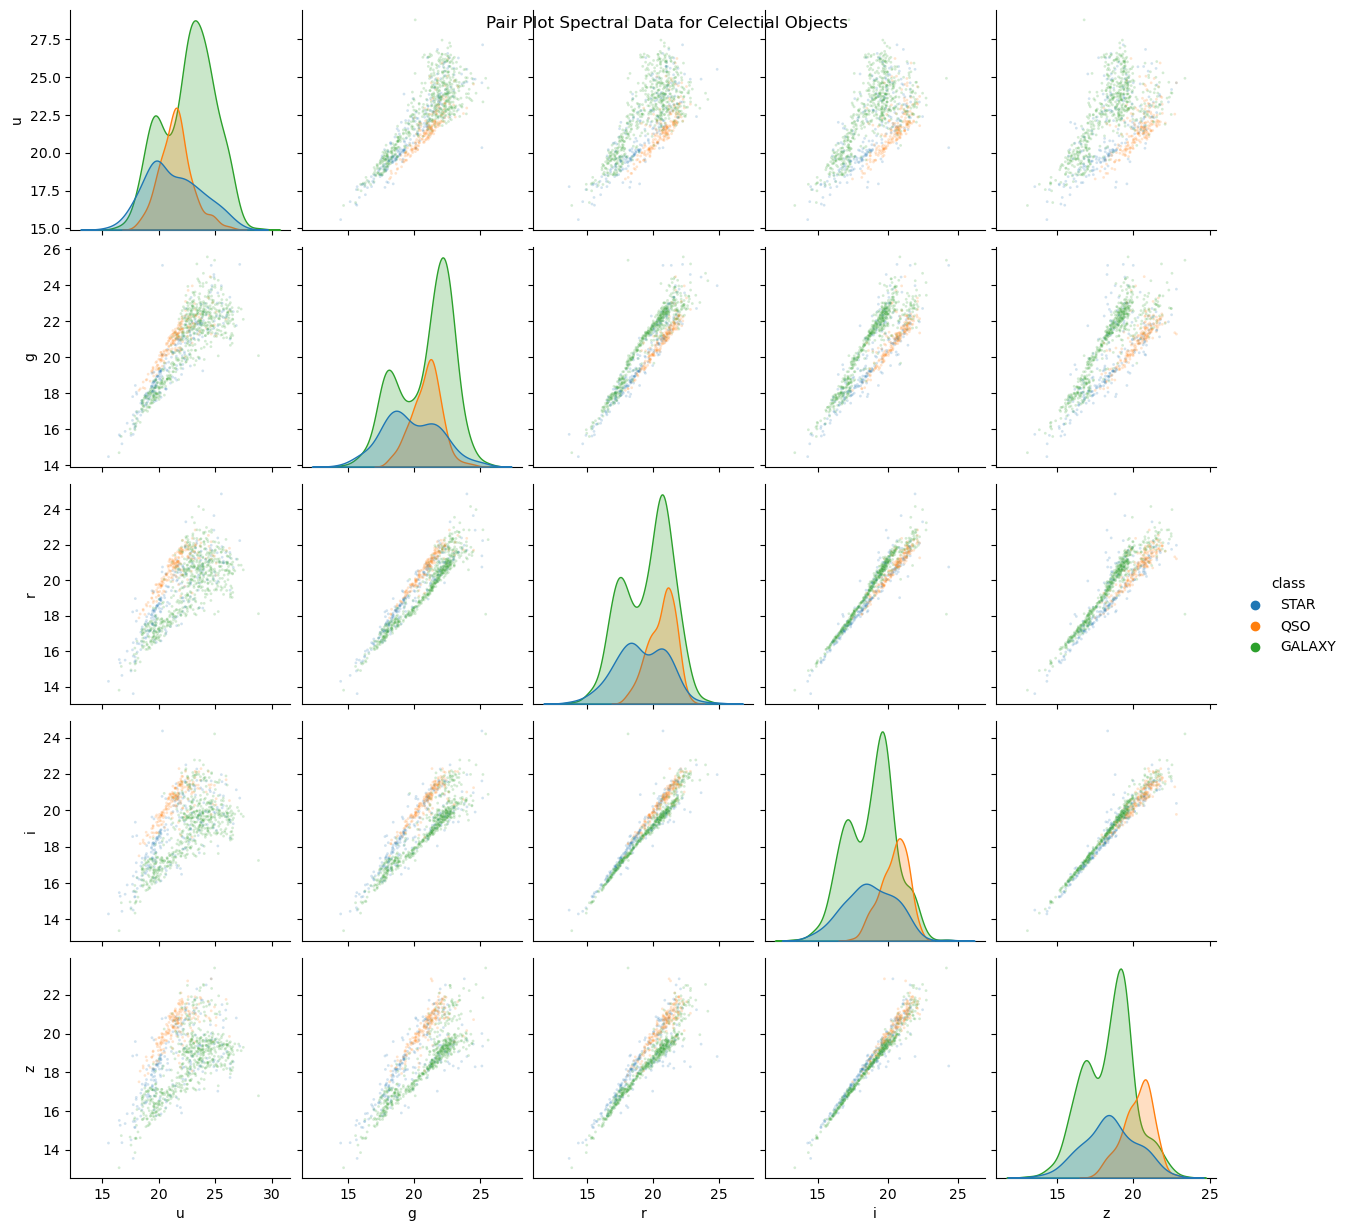

In [13]:
plt.figure(figsize=(20, 20),dpi=600)
pp = sns.pairplot(data=sf, hue="class", plot_kws=dict(s=4,alpha=0.2))
pp.figure.suptitle("Pair Plot Spectral Data for Celectial Objects")
plt.savefig("PairPlot-spectral-data-celectial-obj.png")
plt.show()


In [5]:
features = spectral_features[['u', 'g', 'r', 'i', 'z']]  # Independent variables
target = spectral_features['class']  # Dependent variable

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

## MLP Classifier

In [7]:
# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:


# Neural Network setup with verbose to monitor convergence
nn_model = MLPClassifier(hidden_layer_sizes=(100,), 
                         max_iter=1, 
                         verbose=False, 
                         random_state=42,
                         )
# Lists to store losses
train_losses = []
test_losses = []

# Manually iterating to mimic the effect of seeing convergence per epoch
for _ in range(100): 
    #print(_," Iterations")
    nn_model.fit(X_train_scaled, y_train)
    train_loss = log_loss(y_train, nn_model.predict_proba(X_train_scaled))
    test_loss = log_loss(y_test, nn_model.predict_proba(X_test_scaled))
    train_losses.append(train_loss)
    test_losses.append(test_loss)

/Users/luis/opt/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/luis/opt/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/luis/opt/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/luis/opt/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:

aa = []
for i in range(10,100,10):
    rf_model = RandomForestClassifier(i)
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    aa.append(accuracy)
    #print("Accuracy", round(accuracy*100,2),"%")



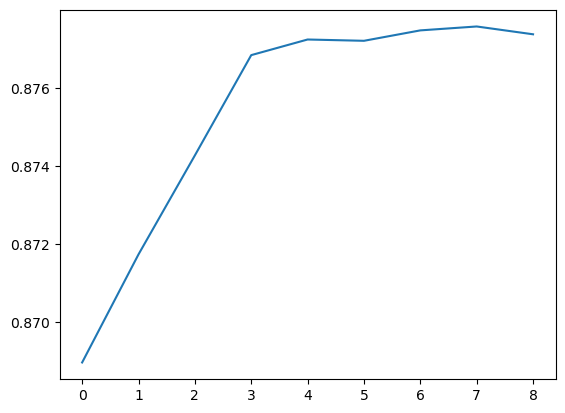

In [18]:
# Graph the accuracy 
plt.plot(aa)



In [8]:

rf_model = SVC(kernel='rbf', C=1)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.863


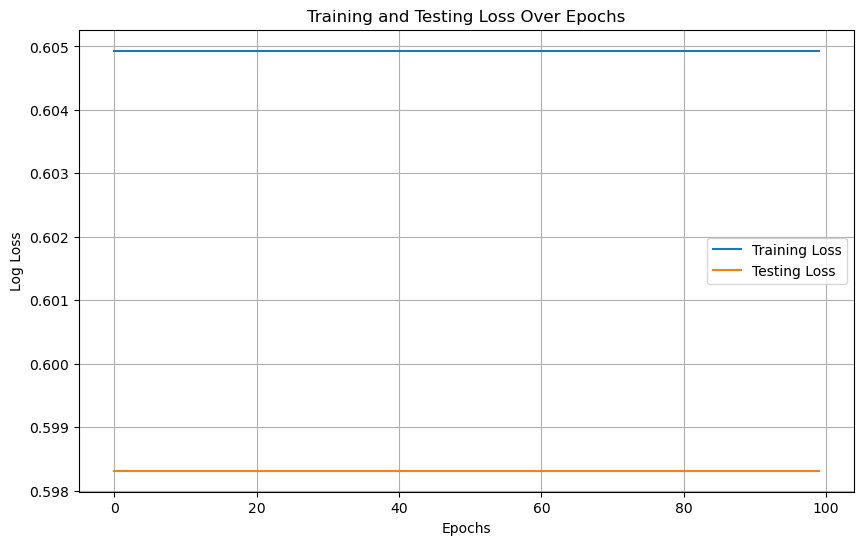

KeyboardInterrupt: 

In [11]:
#Plotting the training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.title('Training and Testing Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()

# Final evaluation
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy", round(accuracy*100,2),"%")

In [30]:
def fetch_image(image_id):
    # Construct the URL
    url = f"http://skyserver.sdss.org/dr1/en/get/frameById.asp?id={image_id}&zoom=25"
    
    # Fetch the image
    response = requests.get(url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img.show()  # This will display the image
        # You can also save the image to disk instead of showing it
        img.save(f'image_{image_id}.jpg')  # Saves the image as a JPEG file
    else:
        print(f"Failed to retrieve image for ID {image_id}")

In [31]:
object_id = df['field_ID']
length = len(object_id)

fetch_image(object_id[2])
# for image_id in range(100):
#     fetch_image(object_id[image_id])